<a href="https://colab.research.google.com/github/csantanaes/analisedadostwitter/blob/main/EARTE_Analise_Twitter_Fev_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#montagem do Drive no Colab 
from google.colab import drive
drive.mount('/content/drive')

In [8]:
# IMPORTANDO CSV para Colab 
import pandas as pd

df = pd.read_csv('/content/sample_data/tweets_EARTE_hydrated.csv')
df.head()
# 

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


In [9]:
#contar quantidade de informações do Dataframe
df.count()

# Total tweets
print ('Total tweets this period:', len(df.index), '\n')

df.head(10)


Total tweets this period: 4998 



,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
5,1348201254250373120,https://twitter.com/OTAKA96438403/status/13482...,Sun Jan 10 09:33:22 +0000 2021,2021-01-10 09:33:22+00:00,OTAKA96438403,@Tea_earte バサッッ🦅,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348200e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1300999909345079296,Wed Sep 02 03:32:40 +0000 2020,False,競馬 /タウロス専門絵師/👺/🫐,637,38,83,0,NaN,🫐OTAKA@中山男🫐,1366,NaN,NaN,False
6,1348203661545988096,https://twitter.com/OTAKA96438403/status/13482...,Sun Jan 10 09:42:55 +0000 2021,2021-01-10 09:42:55+00:00,OTAKA96438403,@Tea_earte ティコロス...タベル🦅,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348201e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1300999909345079296,Wed Sep 02 03:32:40 +0000 2020,False,競馬 /タウロス専門絵師/👺/🫐,637,38,83,0,NaN,🫐OTAKA@中山男🫐,1366,NaN,NaN,False
7,1348210283433447424,https://twitter.com/____stk1022/status/1348210...,Sun Jan 10 10:09:14 +0000 2021,2021-01-10 10:09:14+00:00,____stk1022,@Tea_earte @arashi_0804_ で、出たあ、よく分からんマウント、、！\r...,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348209e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯

In [ ]:
# Print the columns of the dataframe
print(df.columns) 

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')


In [ ]:
print(df['text']) # imprimir somente uma coluna do dataframe

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object


In [ ]:
#informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4998 non-null   int64  
 1   tweet_url                     4998 non-null   object 
 2   created_at                    4998 non-null   object 
 3   parsed_created_at             4998 non-null   object 
 4   user_screen_name              4998 non-null   object 
 5   text                          4998 non-null   object 
 6   tweet_type                    4998 non-null   object 
 7   coordinates                   0 non-null      float64
 8   hashtags                      536 non-null    object 
 9   media                         385 non-null    object 
 10  urls                          290 non-null    object 
 11  favorite_count                4998 non-null   int64  
 12  in_reply_to_screen_name       1255 non-null   object 
 13  in_

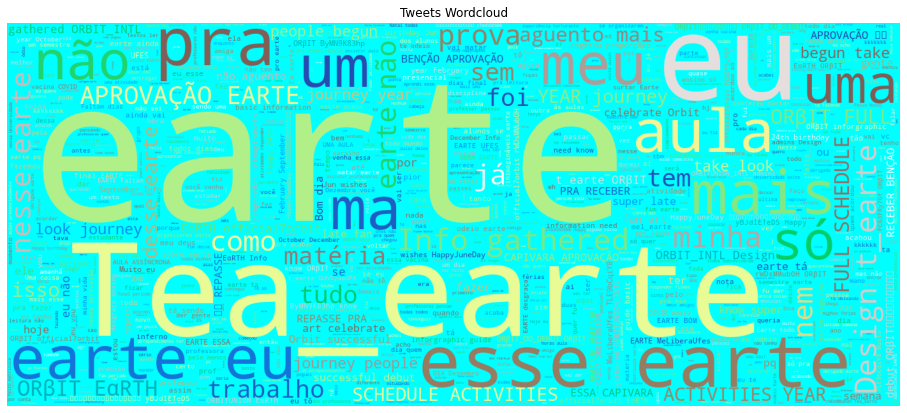

In [10]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json

import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
#import emoji
import collections

st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['que','de','da', 'para', 'https','CO','RT','na','ao','os', 'em','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])


wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df['text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

#https://www.kaggle.com/overload10/twitter-dataset-eda referencia

In [13]:
#Let’s see if there are any null values present in our dataset:
df.isnull().sum()

id                                 0
tweet_url                          0
created_at                         0
parsed_created_at                  0
user_screen_name                   0
text                               0
tweet_type                         0
coordinates                     4998
hashtags                        4462
media                           4613
urls                            4708
favorite_count                     0
in_reply_to_screen_name         3743
in_reply_to_status_id           3750
in_reply_to_user_id             3743
lang                               0
place                           4910
possibly_sensitive              4329
retweet_count                      0
retweet_or_quote_id             3395
retweet_or_quote_screen_name    3395
retweet_or_quote_user_id        3395
source                             1
user_id                            0
user_created_at                    0
user_default_profile_image         0
user_description                 381
u

In [ ]:
for index,text in enumerate(df['text']):
  print('Tweet %d:\n'%(index+1),text)

A saída de streaming foi truncada nas últimas 5000 linhas.
 O que vc curte?

Eu curto falar mal do EARTE https://t.co/JTkpZJlgoN
Tweet 3058:
 eu tô quase trancando a faculdade já pois saturada demais do earte https://t.co/lDcg5DyxzW
Tweet 3059:
 Essa sou eu iludida acreditando que não vai ter EARTE ano que vem kkkkkkk pq aí no caso nunca vou ver essa menina
Tweet 3060:
 O desânimo que dá, quando recebo notificação de atividade no EARTE é algo descomunal.
Tweet 3061:
 incrível como até no earte o fim de semestre causa catástrofes acadêmicas 
essa semana consegui deixar matéria atrasada pela 1ª vez 🥰
Tweet 3062:
 Pô todo dia uma decepção nesse earte
Tweet 3063:
 @t_earte Cute 🤗
Tweet 3064:
 congratulations to our colleagues!!! @jecheverriao @FranciscaPerez_ @InvestigaUSJ #EARTE @_usj_ https://t.co/RLcwO8UXuO
Tweet 3065:
 Eu gastei todas as minhas forças estudando no EARTE por 2 meses... ainda falta 1 mês e eu não aguento mais, não tenho mais saúde pra isso, tem um turbilhão de coisas pra

In [ ]:
#teste sentimento 
from textblob import TextBlob

#iterar imprimindo todos tweets
for text in df:
    print(df.text)




0       A Administração Central da Ufes comunica que a...
1       A Administração Central da Ufes comunica que a...
2       eu n vou formar nunca mais c esse earte puta q...
3       Ufes comunica mais um semestre com o Earte htt...
4       A Administração Central da Ufes comunica que a...
                              ...                        
4993    regra de ouro do earte = fazer as atividades a...
4994                     deus está triste com tanto earte
4995                                 Earte só tem pérolas
4996                                 Earte só tem pérolas
4997    Dês do começo do earte hj foi o meu dia mais i...
Name: text, Length: 4998, dtype: object
0       A Administração Central da Ufes comunica que a...
1       A Administração Central da Ufes comunica que a...
2       eu n vou formar nunca mais c esse earte puta q...
3       Ufes comunica mais um semestre com o Earte htt...
4       A Administração Central da Ufes comunica que a...
                              ..

In [ ]:
from textblob import TextBlob

# perform sentiment analysis on each tweet
# -1 < polarity < 1 (negativity vs positivity (sentiment))
# 0 < subjectivity < 1 (factual vs opinion)
for text in df:
    print(df.text)
    analysis = TextBlob(df.text)
    print(analysis.sentiment)
    print("----------")

#    Deu erro. retomar https://ugoproto.github.io/ugo_py_doc/


0       A Administração Central da Ufes comunica que a...
1       A Administração Central da Ufes comunica que a...
2       eu n vou formar nunca mais c esse earte puta q...
3       Ufes comunica mais um semestre com o Earte htt...
4       A Administração Central da Ufes comunica que a...
                              ...                        
4993    regra de ouro do earte = fazer as atividades a...
4994                     deus está triste com tanto earte
4995                                 Earte só tem pérolas
4996                                 Earte só tem pérolas
4997    Dês do começo do earte hj foi o meu dia mais i...
Name: text, Length: 4998, dtype: object


TypeError: ignored

In [12]:
# Frequecy word
#Create List of Lower Case Words from Tweets

from collections import Counter

for item in df[text]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()




NameError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in train['clean_text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

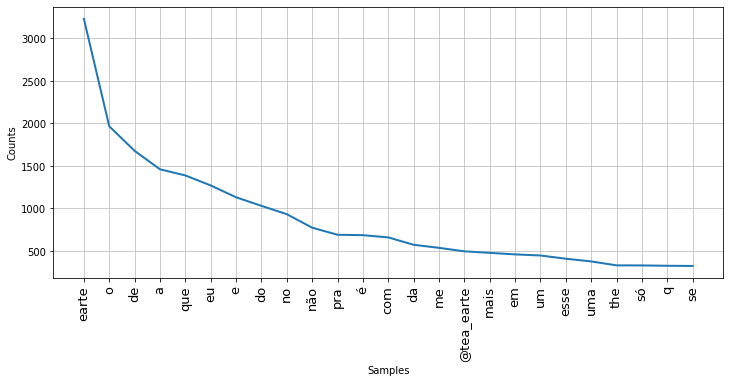

Text(0.5, 0, 'Word Rank')

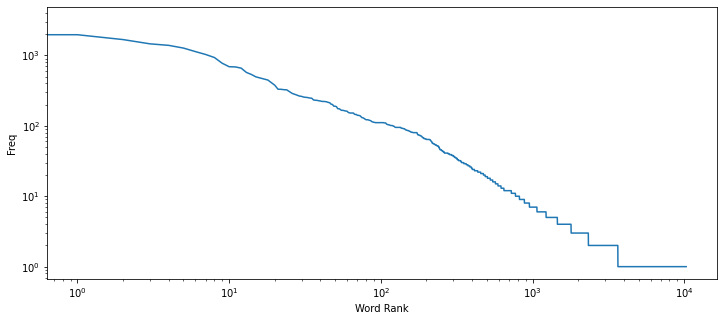

In [14]:
# most common words in twitter dataset

# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
#from nltk.stem.wordnet import WordNetLemmatizerLoad #training dataset to Pandas and preview the top rows.
import matplotlib.pyplot as plt

all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Está funcionando. Falta inserir as stopWord
# https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb

In [ ]:
from prettytable import PrettyTable

for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

NameError: ignored

Number of tweets: 4998
Total number of likes: 196852
Total number of retweets: 1479


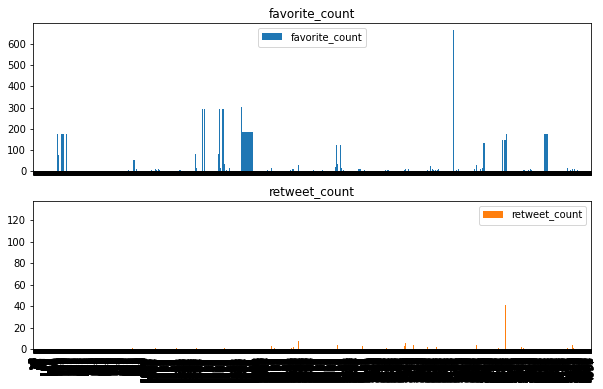

In [ ]:
# Get the data
import matplotlib.pyplot as plt

tweet_count = len(df)
favorite_count = df['favorite_count'].sum()
retweet_count = df['retweet_count'].sum()

# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: '+ str(retweet_count))
# Draw a nice plot of the likes and retweets
df.plot.bar(subplots=True, figsize=(10,6),y=
   ['favorite_count','retweet_count'])
plt.show()

In [ ]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10]
[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para']

len(stopwords)
203

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


203

In [16]:
# Inspecting the distribution of numerical values
df.describe()

,id,coordinates,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweet_or_quote_id,retweet_or_quote_user_id,user_id,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,user_time_zone
count,4.998000e+03,0.0,4998.000000,1.248000e+03,1.255000e+03,4998.000000,1.603000e+03,1.603000e+03,4.998000e+03,4998.000000,4.998000e+03,4998.000000,4998.000000,4.998000e+03,0.0
mean,1.331158e+18,NaN,39.401561,1.336420e+18,8.940547e+17,14.734294,1.329740e+18,5.284473e+17,5.728672e+17,26019.347539,1.867486e+04,461.492197,32.417167,2.276082e+04,NaN
std,9.537462e+15,NaN,95.554256,1.027323e+16,5.380653e+17,41.075401,1.033860e+16,5.754151e+17,5.395033e+17,34814.715111,6.018492e+05,693.456978,927.060666,4.339745e+04,NaN
min,1.314772e+18,NaN,0.000000,1.314919e+18,1.435412e+07,0.000000,1.272075e+18,8.802752e+06,1.981091e+06,0.000000,0.000000e+00,0.000000,0.000000,4.000000e+00,NaN
25%,1.322233e+18,NaN,0.000000,1.327953e+18,3.489445e+17,0.000000,1.321229e+18,1.718442e+08,1.264309e+09,5587.000000,1.220000e+02,159.000000,0.000000,3.915000e+03,NaN
50%,1.331392e+18,NaN,2.000000,1.339261e+18,1.195865e+18,0.000000,1.330527e+18,3.903150e+09,7.540328e+17,14203.000000,2.730000e+02,295.000000,0.000000,9.677000e+03,NaN
75%,1.337527e+18,NaN,9.000000,1.345233e+18,1.302152e+18,2.000000,1.336112e+18,1.227751e+18,1.093070e+18,33549.500000,6.037500e+02,522.000000,2.000000,2.541600e+04,NaN
max,1.349868e+18,NaN,663.000000,1.349767e+18,1.344928e+18,326.000000,1.349862e+18,1.331477e+18,1.349127e+18,350675.000000,2.117059e+07,10759.000000,32195.000000,1.317794e+06,NaN


**Codigos que poderão ser implementados para melhorar esta analise ou futuras**

nRowsRead = 1000 # specify 'None' if want to read whole file
# Tweets.csv has 14640 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/Tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

## importar dataset com encoding 
full_df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', header = None, names = columns,  encoding='latin-1')

##https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis 
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Referências consultadas

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
#https://necromuralist.github.io/Neurotic-Networking/posts/nlp/twitter-word-frequencies/
#https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/
#https://advertools.readthedocs.io/en/master/advertools.word_frequency.html
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
#https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/#base-dados-scripts https://www.oreilly.com/library/view/mining-the-social/9781491973547/ch01.html
https://dev.to/mchdax/coletando-dados-do-twitter-com-python-1c7k
https://www.kaggle.com/amar09/sentiment-analysis-on-scrapped-tweets  LER